In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img, save_img
#from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D, Dense
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [53]:
# Renaming files 
counter = 0
path = "/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Datasets/Original Datasets/Google/Glass Jar"
path_2 = "/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Datasets/Original Datasets/Google/Glass_Jar_2"
for files in os.listdir(path):
    if files == ".DS_Store":
        continue
    else:
        counter+=1
        print("renaming files in", files)
        os.rename(path+"/"+files, path+"/"+"glass_jar_"+str(counter)+".jpeg")
        #new_image = load_img(path+"/"+files, target_size= (224,224))
        #save_img(path_2+"/"+"glass_jar_"+str(counter)+".jpeg", new_image)
    

    

renaming files in glass_jar_81.jpeg
renaming files in glass_jar_166.jpeg
renaming files in glass_jar_189.jpeg
renaming files in glass_jar_39.jpeg
renaming files in glass_jar_218.jpeg
renaming files in glass_jar_131.jpeg
renaming files in glass_jar_424.jpeg
renaming files in glass_jar_127.jpeg
renaming files in glass_jar_432.jpeg
renaming files in glass_jar_1.jpeg
renaming files in glass_jar_78.jpeg
renaming files in glass_jar_259.jpeg
renaming files in glass_jar_97.jpeg
renaming files in glass_jar_170.jpeg
renaming files in glass_jar_222.jpeg
renaming files in glass_jar_388.jpeg
renaming files in glass_jar_367.jpeg
renaming files in glass_jar_275.jpeg
renaming files in glass_jar_330.jpeg
renaming files in glass_jar_54.jpeg
renaming files in glass_jar_263.jpeg
renaming files in glass_jar_42.jpeg
renaming files in glass_jar_326.jpeg
renaming files in glass_jar_234.jpeg
renaming files in glass_jar_371.jpeg
renaming files in glass_jar_408.jpeg
renaming files in glass_jar_185.jpeg
renaming 

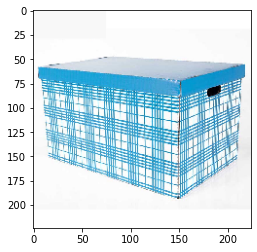

In [3]:
my_image = load_img("/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Datasets/Original Datasets/Flickr_Bing/Cardboard/Cardboard Box/Cardboard_box_85.jpg", target_size = (224,224))
plt.imshow(my_image)
plt.show()

In [21]:
my_image.size

(224, 224)

In [22]:
my_image = img_to_array(my_image)
my_image.shape

(224, 224, 3)

In [5]:
material_labels = {0:"cardoard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}

In [6]:
data_path = "/Users/fouad/Downloads/dataset-original/"
X_list = []
y_list = []
for folders in os.listdir(data_path):
    if folders == ".DS_Store":
        print("found .DS_Store")
        continue
    if folders == "cardboard":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([1,0,0,0,0,0])
    if folders == "glass":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([0,1,0,0,0,0])
    if folders == "metal":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([0,0,1,0,0,0])
    if folders == "paper":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([0,0,0,1,0,0])
    if folders == "plastic":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([0,0,0,0,1,0])
    if folders == "trash":
        for files in os.listdir(data_path+"//"+folders):
            if files == ".DS_Store":
                continue
            X_list.append(img_to_array(load_img(data_path+"//"+folders+"//"+files, target_size=(224,224))))
            y_list.append([0,0,0,0,0,1])

X = np.array(X_list)
y = np.array(y_list)            

found .DS_Store


In [7]:
print(X.shape)
print(y.shape)

(2527, 224, 224, 3)
(2527, 6)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2274, 224, 224, 3)
(2274, 6)
(253, 224, 224, 3)
(253, 6)


In [33]:
from tensorflow.keras.applications import DenseNet169
densenet = DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

In [34]:
densenet.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block25_1_conv (Conv2D)   (None, 7, 7, 128)    180224      conv5_block25_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block25_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block25_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block25_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block25_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block25_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block25_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block25_concat (Concatena (None, 7, 7, 1440)   0           conv5_block24_concat[0][0]       
          

In [35]:
for layers in densenet.layers:
    layers.trainable = False
base_output = GlobalAveragePooling2D()(densenet.output)
final_output = Dense(6, activation = "softmax")(base_output)
final_output

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dense_1')>

In [36]:
my_model = Model(inputs = densenet.input, outputs = final_output)

In [37]:
my_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

Total params: 12,652,870
Trainable params: 9,990
Non-trainable params: 12,642,880
__________________________________________________________________________________________________


In [38]:
my_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
my_model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20)

Epoch 1/20
72/72 [==============================] - 399s 5s/step - loss: 4.4896 - accuracy: 0.2660 - val_loss: 1.6501 - val_accuracy: 0.4783
Epoch 2/20
72/72 [==============================] - 331s 5s/step - loss: 1.5663 - accuracy: 0.5032 - val_loss: 1.2682 - val_accuracy: 0.5494
Epoch 3/20
72/72 [==============================] - 331s 5s/step - loss: 1.1883 - accuracy: 0.6048 - val_loss: 1.0380 - val_accuracy: 0.6245
Epoch 4/20
72/72 [==============================] - 330s 5s/step - loss: 1.0492 - accuracy: 0.6492 - val_loss: 1.0943 - val_accuracy: 0.6324
Epoch 5/20
72/72 [==============================] - 321s 4s/step - loss: 0.9558 - accuracy: 0.6680 - val_loss: 1.0038 - val_accuracy: 0.6324
Epoch 6/20
72/72 [==============================] - 360s 5s/step - loss: 1.0711 - accuracy: 0.6637 - val_loss: 1.0107 - val_accuracy: 0.6957
Epoch 7/20
72/72 [==============================] - 344s 5s/step - loss: 0.8655 - accuracy: 0.6900 - val_loss: 1.0068 - val_accuracy: 0.6798
Epoch 8/20
72

KeyboardInterrupt: 

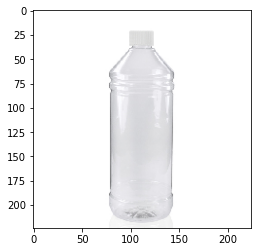

In [123]:
test_image = load_img("/Users/fouad/Desktop/test_bottle.jpeg", target_size=(224,224))
plt.imshow(test_image)
plt.show()

In [124]:
test_image = (img_to_array(test_image)).reshape(1,224,224,3)
test_image.shape

(1, 224, 224, 3)

In [125]:
material_labels[int(np.argmax(my_model.predict(test_image), axis = -1))]

'metal'

In [126]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [127]:
tf.__version__

'2.4.0'

In [28]:
import pickle
densenethistory = "/Users/fouad/Downloads/trainHistoryDensenet169"


In [29]:
densenethistory

'/Users/fouad/Downloads/trainHistoryDensenet169'

In [34]:
filename = "/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Data Processing Code/trainHistoryDensenet169 "
file = open(filename,'rb')
object_file = pickle.load(file)
file.close()

In [35]:
object_file

{'loss': [0.5449342131614685,
  0.31972604990005493,
  0.27507317066192627,
  0.24857355654239655,
  0.23066316545009613,
  0.22042465209960938,
  0.20572665333747864,
  0.198788121342659,
  0.18943168222904205,
  0.18422797322273254,
  0.17779041826725006,
  0.17244462668895721,
  0.16994954645633698,
  0.1629820019006729,
  0.15999102592468262,
  0.1555372178554535],
 'accuracy': [0.8303208351135254,
  0.8940381407737732,
  0.9099061489105225,
  0.9181728959083557,
  0.9246532320976257,
  0.9267899394035339,
  0.9312736392021179,
  0.93526691198349,
  0.9370884299278259,
  0.9383494257926941,
  0.940311074256897,
  0.942307710647583,
  0.9431133270263672,
  0.9444094300270081,
  0.9456704258918762,
  0.9488580822944641],
 'val_loss': [0.31151291728019714,
  0.2836490571498871,
  0.2861630618572235,
  0.28766000270843506,
  0.2824708819389343,
  0.28007787466049194,
  0.2934681177139282,
  0.2851851284503937,
  0.29066002368927,
  0.2957428991794586,
  0.29403629899024963,
  0.3087490

In [2]:
material_labels = {'Cardboard': 0, 'Chips Bag': 1, 'Drinking Carton': 2, 'Glass Bottle': 3,
                   'Glass Cup': 4, 'Metal Can': 5, 'Organic': 6, 'Paper': 7, 'Plastic Bag':
                   8, 'Plastic Bottle': 9, 'Plastic Box': 10, 'Plastic Round Container': 11}

In [24]:
from keras.models import load_model
#my_densenet = load_model("/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Models/densenet169_model.h5")
my_inceptionresnet = load_model("/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Models/inceptionresnet_model.h5")
#my_nasnetlarge = load_model("/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Models/nasnetlarge_model.h5")



ValueError: bad marshal data (unknown type code)

In [17]:
image_path = "/Users/fouad/Desktop/HU - Master Data Driven Design/Graduation/Datasets/Original Datasets/dataset-original/glass/glass3.jpg"
my_image = img_to_array(load_img(image_path, target_size = (331,331)))


In [18]:
my_image = my_image/255.

In [19]:
my_image = my_image.reshape(1,331,331,3)

In [20]:
predictions = np.argmax(my_nasnetlarge.predict(my_image), axis = -1)


In [21]:
predictions

array([4])

In [6]:
print(tf.__version__)

2.4.0
